# WeatherPy
### Data Analysis of weather variables relationship to geographic coordinates

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats

# Import API key
from api_keys import ow_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"City count: {len(cities)}")

City count: 618


### Perform API Calls
* Weather check on each city using a series of successive API calls.
* Print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
## OPEN WEATHER API

## Set OpenWeather API base url
ow_url = "http://api.openweathermap.org/data/2.5/weather?q="
## Set Units
units = "imperial"

## Create weather data empty list
weather_data = []
## Set initial values
record = 1

## Print Log Header
print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
        ## Adjust query url for current city
        query_url = f"{ow_url}{city}&appid={ow_key}&units={units}"
        response = requests.get(query_url).json()
        try:
            ## Print Log Status
            print(f"Processing Record {record:>2d} | City Id = {response['id']:<7d} [{city}]")
            ## Retrieve weather data from OpenWeather API (response)
            weather_data.append({
                'City': response['name'],
                'Lat': response['coord']['lat'],
                'Lng': response['coord']['lon'],
                'Max Temp': response['main']['temp_max'],
                'Humidity': response['main']['humidity'],
                'Cloudiness': response['clouds']['all'],
                'Wind Speed': response['wind']['speed'],
                'Country': response['sys']['country'],
                'Date': response['dt']
            })
            ## Record counter
            record += 1
        except KeyError:
            ## Print Log Status
            print(f"City [{city}] not found. Skipping...")
            pass

## Print Log Footer
print("------------------------------")        
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record  1 | City Id = 2017155 [saskylakh]
Processing Record  2 | City Id = 3883457 [lebu]
Processing Record  3 | City Id = 146137  [polis]
Processing Record  4 | City Id = 934322  [mahebourg]
Processing Record  5 | City Id = 4169345 [princeton]
City [tsihombe] not found. Skipping...
Processing Record  6 | City Id = 2122605 [okhotsk]
Processing Record  7 | City Id = 2139521 [noumea]
Processing Record  8 | City Id = 5122534 [jamestown]
Processing Record  9 | City Id = 3430863 [mar del plata]
Processing Record 10 | City Id = 1268772 [junagarh]
Processing Record 11 | City Id = 1651810 [airai]
Processing Record 12 | City Id = 3418910 [upernavik]
Processing Record 13 | City Id = 4231997 [avera]
Processing Record 14 | City Id = 1259385 [port blair]
Processing Record 15 | City Id = 1507390 [dikson]
City [barentsburg] not found. Skipping...
Processing Record 16 | City Id = 3369157 [cape town]
Processing Record 17 | City Id = 210

Processing Record 144 | City Id = 5467328 [farmington]
City [nguiu] not found. Skipping...
City [sumbawa] not found. Skipping...
Processing Record 145 | City Id = 3622537 [parrita]
Processing Record 146 | City Id = 3132644 [varhaug]
Processing Record 147 | City Id = 2986795 [plerin]
Processing Record 148 | City Id = 2094144 [kerema]
Processing Record 149 | City Id = 506232  [porosozero]
Processing Record 150 | City Id = 1224061 [wattegama]
Processing Record 151 | City Id = 4031637 [lavrentiya]
Processing Record 152 | City Id = 1006984 [east london]
Processing Record 153 | City Id = 2068110 [kununurra]
Processing Record 154 | City Id = 2396518 [port-gentil]
Processing Record 155 | City Id = 5919850 [chapais]
Processing Record 156 | City Id = 1106677 [bambous virieux]
Processing Record 157 | City Id = 3395981 [maceio]
Processing Record 158 | City Id = 556268  [ostrovnoy]
City [karaul] not found. Skipping...
Processing Record 159 | City Id = 3443061 [chuy]
Processing Record 160 | City Id 

Processing Record 291 | City Id = 634093  [tornio]
Processing Record 292 | City Id = 5983607 [inuvik]
Processing Record 293 | City Id = 3458498 [linhares]
Processing Record 294 | City Id = 3372760 [praia da vitoria]
Processing Record 295 | City Id = 3868633 [vallenar]
Processing Record 296 | City Id = 4018700 [altar]
City [nizhneyansk] not found. Skipping...
Processing Record 297 | City Id = 2029156 [suhbaatar]
Processing Record 298 | City Id = 260895  [karpathos]
Processing Record 299 | City Id = 1806408 [yangjiang]
Processing Record 300 | City Id = 3191648 [zlobin]
Processing Record 301 | City Id = 1489853 [tazovskiy]
Processing Record 302 | City Id = 1052944 [angoche]
Processing Record 303 | City Id = 6121621 [revelstoke]
Processing Record 304 | City Id = 3974149 [los zacatones]
Processing Record 305 | City Id = 214614  [kamina]
Processing Record 306 | City Id = 3893629 [coquimbo]
Processing Record 307 | City Id = 2016216 [sosnovo-ozerskoye]
Processing Record 308 | City Id = 6324729

Processing Record 438 | City Id = 1264075 [malkangiri]
Processing Record 439 | City Id = 5851349 [nanakuli]
City [karauzyak] not found. Skipping...
Processing Record 440 | City Id = 237379  [ndele]
Processing Record 441 | City Id = 1267390 [kavaratti]
Processing Record 442 | City Id = 4033356 [tiarei]
Processing Record 443 | City Id = 4734350 [stephenville]
Processing Record 444 | City Id = 1850523 [tateyama]
Processing Record 445 | City Id = 1697696 [nieves]
Processing Record 446 | City Id = 780643  [bjornevatn]
Processing Record 447 | City Id = 3530599 [carmen]
Processing Record 448 | City Id = 777019  [vardo]
Processing Record 449 | City Id = 1640972 [katobu]
Processing Record 450 | City Id = 3693584 [pimentel]
Processing Record 451 | City Id = 712926  [balakliya]
Processing Record 452 | City Id = 2062276 [roebourne]
City [urdzhar] not found. Skipping...
Processing Record 453 | City Id = 4741752 [wichita falls]
Processing Record 454 | City Id = 325304  [afsin]
Processing Record 455 

In [4]:
# Print the city count to confirm updated count
print(f"Updated city count: {len(weather_data)}")

Updated city count: 570


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display DataFrame

In [5]:
## Build DataFrame
raw_city_data = pd.DataFrame(data = weather_data)

## Export DataFrame (of all retrieved data) to CSV
raw_city_data.to_csv('Output/Cities.csv', index=False, header=True, encoding='utf-8')

## Display DataFrame
raw_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,34.02,99,100,7.47,RU,1619754043
1,Lebu,-37.6167,-73.6500,55.09,94,100,8.59,CL,1619754043
2,Polis,35.0367,32.4264,66.20,27,0,5.75,CY,1619754043
3,Mahébourg,-20.4081,57.7000,77.00,83,75,14.97,MU,1619754044
4,Princeton,25.5384,-80.4089,78.80,83,1,3.44,US,1619754044


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
## Inspect data to check max humidity is equal or less than 100%
raw_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,21.324774,14.783360,61.728386,68.856140,52.101754,7.092579,1.619754e+09
std,33.017263,88.435034,18.707026,22.670801,39.452717,4.615017,7.437180e+01
min,-54.800000,-179.166700,12.020000,1.000000,0.000000,0.290000,1.619754e+09
25%,-4.764725,-63.124200,46.400000,57.000000,9.000000,3.785000,1.619754e+09
50%,26.442750,20.357000,64.400000,74.000000,57.000000,5.990000,1.619754e+09
75%,49.783375,86.068500,77.000000,87.000000,90.750000,9.220000,1.619754e+09
max,78.218600,179.316700,100.990000,100.000000,100.000000,26.460000,1.619754e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
outlier_index = raw_city_data.loc[raw_city_data['Humidity']>100].index
print(f"Number of cities with humidity over 100%: {len(outlier_index)}")
print(f"Indices: {outlier_index}")

Number of cities with humidity over 100%: 0
Indices: Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_city_data.drop(index=outlier_index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,34.02,99,100,7.47,RU,1619754043
1,Lebu,-37.6167,-73.6500,55.09,94,100,8.59,CL,1619754043
2,Polis,35.0367,32.4264,66.20,27,0,5.75,CY,1619754043
3,Mahébourg,-20.4081,57.7000,77.00,83,75,14.97,MU,1619754044
4,Princeton,25.5384,-80.4089,78.80,83,1,3.44,US,1619754044


In [9]:
## Inspect data to check max humidity is equal or less than 100%
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,21.324774,14.783360,61.728386,68.856140,52.101754,7.092579,1.619754e+09
std,33.017263,88.435034,18.707026,22.670801,39.452717,4.615017,7.437180e+01
min,-54.800000,-179.166700,12.020000,1.000000,0.000000,0.290000,1.619754e+09
25%,-4.764725,-63.124200,46.400000,57.000000,9.000000,3.785000,1.619754e+09
50%,26.442750,20.357000,64.400000,74.000000,57.000000,5.990000,1.619754e+09
75%,49.783375,86.068500,77.000000,87.000000,90.750000,9.220000,1.619754e+09
max,78.218600,179.316700,100.990000,100.000000,100.000000,26.460000,1.619754e+09


## Plotting the Data
* Proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
## SET PARAMETERS

## Date of analysis: Get current time and covert date to string (mm/dd/yyyy)
date = time.strftime('%m-%d-%Y')

## Set initial values
figure_num = 1

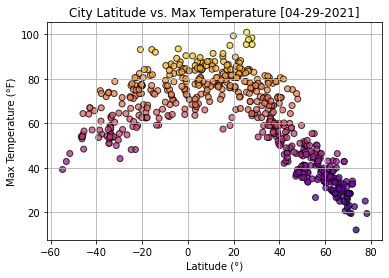

In [11]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='royalblue', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## Show grid
plt.grid()
# Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

A scatter plot is a diagram that uses values of two variables as cartesian coordinates. The scope of this analsys is to look for a relationship between latitude and diverse weather markers (max temperature, humidity, cloudiness and wind speed). As such, latitude is considered as an independent variable and weather markers as dependant (to latitude) variables. This plot is used to visually discover if there is any relationship between the selected variables.

In the plot depicted above, each dot represents the latitude (x) and max temperature (y) of any given city; the color of each dot is given by the max temperature value.

The way the dots are dispersed show that latitude and max temperature are related. In the plot there is a clear pattern: max temperature values increase as we approach the equator (latitude = 0°). This is true for the northern hemisphere (latitude > 0°) as well as for the southern hemisphere (latitude < 0°).

This scatter plot could be split for northern & southern hemispheres in order to show -from a visual approach- if this relationship is linear.

## Latitude vs. Humidity Plot

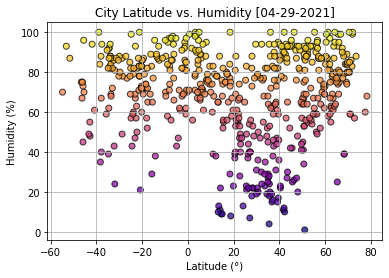

In [12]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='orange', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Humidity [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

In the plot depicted above, each dot represents the latitude (x) and humidity (y) of any given city; the color of each dot is given by the humidity value.

The way the dots are dispersed show that latitude and humidity are not related. In the plot there is no clear pattern: moving along latitude values does not represent a continuous behaviour for humidity values. Nevertheless, there is a hollow area in the latitude range around the equator (-20° and 20°) that could indicate higher humidity values concentration (group of dots).

This scatter plot could be split for northern & southern hemispheres in order to provide a more detailed dispersion diagram.

## Latitude vs. Cloudiness Plot

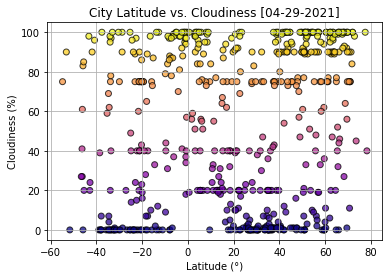

In [13]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='purple', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Cloudiness [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

In the plot depicted above, each dot represents the latitude (x) and cloudiness (y) of any given city; the color of each dot is given by the cloudiness value.

The way the dots are dispersed show that latitude and cloudiness are not related. In the plot there is no clear pattern: moving along latitude values does not represent a continuous behaviour for humidity values. Hollow areas and dot groups are not continuous.

This scatter plot could be split for northern & southern hemispheres in order to provide a more detailed dispersion diagram.

## Latitude vs. Wind Speed Plot

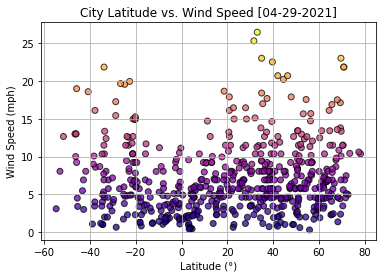

In [14]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='green', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Wind Speed [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

In the plot depicted above, each dot represents the latitude (x) and wind speed (y) of any given city; the color of each dot is given by the wind speed value.

The way the dots are dispersed show that latitude and wind speed are not related. In the plot there is no clear pattern: moving along latitude values does not represent a continuous behaviour for humidity values. Hollow areas and dot groups are not continuous and highest wind speed values could be considered as outliers (extreme values).

This scatter plot could be split for northern & southern hemispheres in order to provide a more detailed dispersion diagram.

## Linear Regression

In [15]:
## SEPARATE NORTHERN & SOUTHERN HEMISPHERES (get .loc booleans)

## Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hemisphere = clean_city_data["Lat"] >= 0
## Southern Hemisphere (less than 0 degrees latitude)
south_hemisphere = clean_city_data["Lat"] < 0

In [16]:
## LATITUDE LINEAR REGRESSION AS A FUNCTION

## Define Linear Regression using Latitude as independent variable
## using hemisphere and dependent variable as arguments
def latitude_regression (hemisphere, variable, y_label, figure_num):

    ## Set initial values for Northern Hemisphere
    if hemisphere == 'North':
        x_values = clean_city_data['Lat'].loc[north_hemisphere]
        y_values = clean_city_data[variable].loc[north_hemisphere]
        x_label = "Northern Hemisphere Latitude (°)"
        color='royalblue'
        alpha=0.3
            
    ## Set initial values for Southern Hemisphere
    elif hemisphere == 'South':
        x_values = clean_city_data['Lat'].loc[south_hemisphere]
        y_values = clean_city_data[variable].loc[south_hemisphere]
        x_label = "Southern Hemisphere Latitude (°)"
        color = 'yellow'
        alpha=0.4
        
    ## LINEAR REGRESSION
    ## Compute Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    ## Set regression line parameters (x0-x1)
    regress_line_x = (min(x_values), max(x_values))
    ## Set regression line parameters (y0-y1)
    regress_line_y = [min(x_values) * slope + intercept, max(x_values) * slope + intercept]
    # Set regresion line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## SCATTER PLOT
    ## Set Scatter Plot parameters
    plt.scatter(x_values, y_values, color=color, alpha=alpha, edgecolors= "black")

    # Set Title, X Label, and Y Label
    plt.title(f"City Latitude vs. {variable} [{date}]")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    ## REGRESSION LINE PLOT
    ## Set Line Plot parameters
    plt.plot(regress_line_x, regress_line_y, linestyle=(0, (5, 1)), color='darkred', alpha=1, linewidth=2.5)
    
    ## Set x,y annotation location depending on regression line starting position
    x_annotate = (max(x_values)-min(x_values))*0.05 + min(x_values)
    if (regress_line_y[0]-min(y_values)) > ((max(y_values)-min(y_values))/2):
        y_annotate = (max(y_values)-min(y_values))*0.05 + min(y_values)
    else:
        y_annotate = (max(y_values)-min(y_values))*0.8 + min(y_values)
    
    ## Annotate regression line equation & r-squared
    plt.annotate(f"{line_eq}\n", (x_annotate, y_annotate), fontsize=15, color='darkred')
    plt.annotate(f"r-squared: {rvalue**2:.2%}", (x_annotate, y_annotate), fontsize=12, color='darkred')
    
    ## Save plot
    plt.savefig(f"Output/Fig_{figure_num:02d}.png")
    figure_num += 1
    
    ## Show plot
    plt.show()
    
    ## Display Regression R^2 & Pearson Correlation
    ## Print r-value
    print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.2f}")
    ## Print r-squared
    print(f"Pearson correlation coefficient (r-value): {round(stats.pearsonr(x_values, y_values)[0],2)}")
    
    return figure_num

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

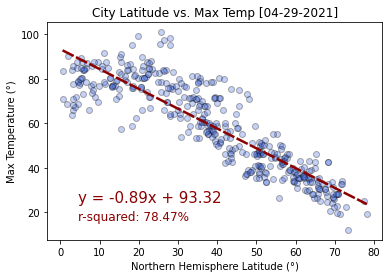

Linear reggression coefficient of detemination (r-squared): 0.78
Pearson correlation coefficient (r-value): -0.89


In [17]:
figure_num = latitude_regression('North', 'Max Temp', 'Max Temperature (°)', figure_num)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

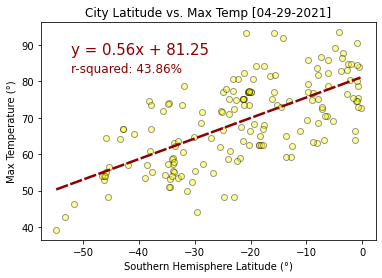

Linear reggression coefficient of detemination (r-squared): 0.44
Pearson correlation coefficient (r-value): 0.66


In [18]:
figure_num = latitude_regression('South', 'Max Temp', 'Max Temperature (°)', figure_num)

Splitting scatter plots in hemispheres show a linear relationship between latitude values and max temperature values. For the northern hemisphere values are inversly related (max temperature decreases as latitude increases), for the southern hemisphere values are directly related (max temperature increases as latitude increases). This confirms our initial observation: as we approach the eaquator, max temperature values increase.

This relationship is confirmed numerically with the tools being used: r-Pearson values (-0.87, 0.72) indicate a high degree of correlation, and should be interpreted that max temperature values are (inversly, directly) related to latitude.

R-squared values suggest that +75% of the max temperature variation (for the northern hemisphere) can be explained by latitude and +50% of the max temperature variation (for the southern hemisphere) can be explained by latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

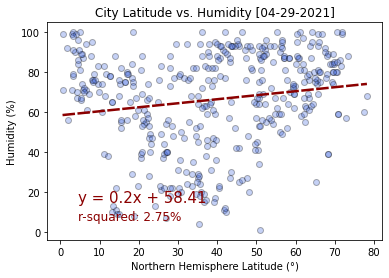

Linear reggression coefficient of detemination (r-squared): 0.03
Pearson correlation coefficient (r-value): 0.17


In [19]:
figure_num = latitude_regression('North', 'Humidity', 'Humidity (%)', figure_num)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

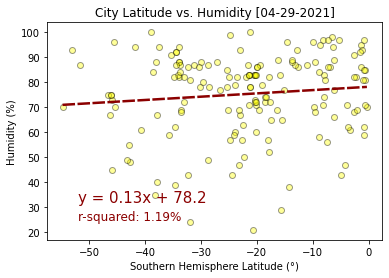

Linear reggression coefficient of detemination (r-squared): 0.01
Pearson correlation coefficient (r-value): 0.11


In [20]:
figure_num = latitude_regression('South', 'Humidity', 'Humidity (%)', figure_num)

Splitting scatter plots in hemispheres don't show a continuous behaviour for humidity values. Nevertheless, this pair of plots might suggest that lower humidity values are grouped in the middle ranges of each hemisphere. Hemisphere extremes (north pole, equator and south pole) display higher humidity values concentration.

This suggestion can't be confirmed numerically with the tools being used: r-Pearson values (0.19, 0.11) indicate a very low degree of correlation, and should be interpreted that humidity values are not related to latitude.

R-squared values suggest humidity variation can't be explained by latitude (for any hemisphere).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

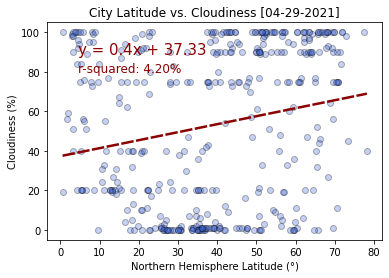

Linear reggression coefficient of detemination (r-squared): 0.04
Pearson correlation coefficient (r-value): 0.21


In [21]:
figure_num = latitude_regression('North', 'Cloudiness', 'Cloudiness (%)', figure_num)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

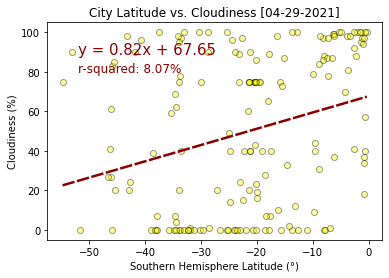

Linear reggression coefficient of detemination (r-squared): 0.08
Pearson correlation coefficient (r-value): 0.28


In [22]:
figure_num = latitude_regression('South', 'Cloudiness', 'Cloudiness (%)', figure_num)

Splitting scatter plots in hemispheres don't show a clear relationship for cloudiness values, and there are no observable patterns.

This lack of relationship is confirmed numerically with the tools being used: r-Pearson values (0.15, 0.21) indicate a very low degree of correlation, and should be interpreted that cloudiness values are not related to latitude.

R-squared values suggest cloudiness variation can't be explained by latitude (for any hemisphere).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

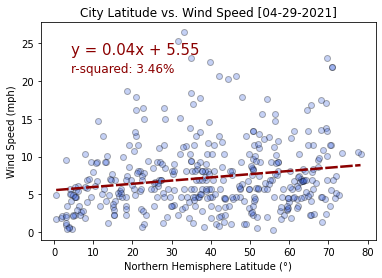

Linear reggression coefficient of detemination (r-squared): 0.03
Pearson correlation coefficient (r-value): 0.19


In [23]:
figure_num = latitude_regression('North', 'Wind Speed', 'Wind Speed (mph)', figure_num)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

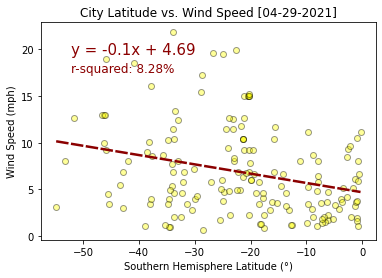

Linear reggression coefficient of detemination (r-squared): 0.08
Pearson correlation coefficient (r-value): -0.29


In [24]:
figure_num = latitude_regression('South', 'Wind Speed', 'Wind Speed (mph)', figure_num)

Splitting scatter plots in hemispheres don't show a clear relationship for wind speed values, and there are no observable patterns.

This lack of relationship is confirmed numerically with the tools being used: r-Pearson values (0.08, -0.17) indicate a very low degree of correlation, and should be interpreted that wind speed values are not related to latitude.

R-squared values suggest wind speed variation can't be explained by latitude (for any hemisphere).

In [25]:
## Reset figure number variable
figure_num = 1